In [3]:
!pip install -q tensorflow

In [4]:
!pip install -q tensorboard

In [1]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/MNIST_database'
iframe = ''
HTML(iframe)

In [2]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

In [4]:
seed = 11
np.random.seed(seed)

In [5]:
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


First label from training dataset : 5


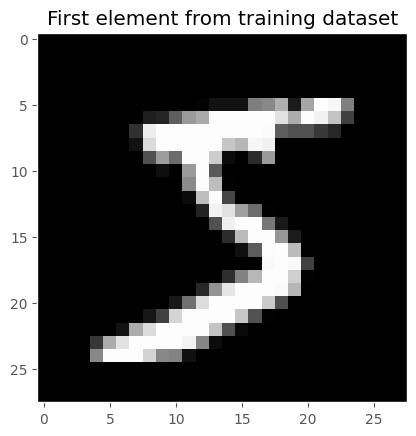

In [6]:
plt.title("First element from training dataset")
plt.imshow(train_imgs[0], cmap="gray")
plt.grid(False)
print(f"First label from training dataset : {train_lbls[0]}")

In [7]:
trn, trw, trh = train_imgs.shape
tsn, tsw, tsh = test_imgs.shape
train_imgs = train_imgs.reshape((trn, trw, trh, 1)).astype('float32')
test_imgs = test_imgs.reshape((tsn, tsw, tsh, 1)).astype('float32')

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [10]:
model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
epochs = 5
model.fit(train_imgs, train_lbls, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0347 - accuracy: 0.9896
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0234 - accuracy: 0.9931
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9951


In [13]:
test_loss, test_acc = model.evaluate(test_imgs, test_lbls, verbose=False)
print('Test loss : ', test_loss)
print('Test Accuracy : ', test_acc)

Test loss :  0.07339278608560562
Test Accuracy :  0.9868999719619751


The label of testing images is : 7



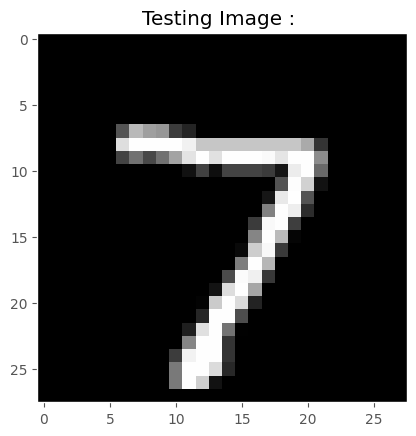

In [14]:
print(f"The label of testing images is : {test_lbls[0]}")
plt.title('Testing Image : ')
plt.imshow(np.squeeze(test_imgs[0]), cmap="gray")
plt.grid(False)
print()

In [18]:
prediction_vector = model.predict(test_imgs[[1]])
predicted_digit = np.argmax(prediction_vector)
print(f"The 0-9 prediction is: {predicted_digit}")
print()

1/1 [==============================] - 0s 43ms/step
The 0-9 prediction is: 2

